# Data Analysis UW Madison

## Data Overview

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('/Users/elizabethnemeti/Desktop/uw-madison-gi-tract-image-segmentation/train.csv')
df.head()

,id,class,segmentation
0,case123_day20_slice_0001,large_bowel,NaN
1,case123_day20_slice_0001,small_bowel,NaN
2,case123_day20_slice_0001,stomach,NaN
3,case123_day20_slice_0002,large_bowel,NaN
4,case123_day20_slice_0002,small_bowel,NaN


In [5]:
df[df['segmentation'] != np.nan]

,id,class,segmentation
0,case123_day20_slice_0001,large_bowel,NaN
1,case123_day20_slice_0001,small_bowel,NaN
2,case123_day20_slice_0001,stomach,NaN
3,case123_day20_slice_0002,large_bowel,NaN
4,case123_day20_slice_0002,small_bowel,NaN
...,...,...,...
115483,case30_day0_slice_0143,small_bowel,NaN
115484,case30_day0_slice_0143,stomach,NaN
115485,case30_day0_slice_0144,large_bowel,NaN
115486,case30_day0_slice_0144,small_bowel,NaN


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115488 entries, 0 to 115487
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            115488 non-null  object
 1   class         115488 non-null  object
 2   segmentation  33913 non-null   object
dtypes: object(3)
memory usage: 2.6+ MB


In [7]:
df.describe(include='all')

,id,class,segmentation
count,115488,115488,33913
unique,38496,3,33899
top,case123_day20_slice_0001,large_bowel,12629 10 12894 12 13158 15 13423 17 13688 19 1...
freq,3,38496,2


In [8]:
missing_values = df.isnull().sum()
missing_values

id                  0
class               0
segmentation    81575
dtype: int64

In [9]:
duplicate_entries = df.duplicated().sum()
duplicate_entries

0

In [10]:
unique_classes = df['class'].unique()
unique_classes

array(['large_bowel', 'small_bowel', 'stomach'], dtype=object)

## Handling Missing Values

In [11]:
df_with_segmentation = df.dropna(subset=['segmentation'])
df_without_segmentation = df[df['segmentation'].isnull()]

df_with_segmentation.info(), df_with_segmentation.describe(include='all')
df_without_segmentation.info(), df_without_segmentation.describe(include='all')

<class 'pandas.core.frame.DataFrame'>
Index: 33913 entries, 194 to 115465
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            33913 non-null  object
 1   class         33913 non-null  object
 2   segmentation  33913 non-null  object
dtypes: object(3)
memory usage: 1.0+ MB
<class 'pandas.core.frame.DataFrame'>
Index: 81575 entries, 0 to 115487
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            81575 non-null  object
 1   class         81575 non-null  object
 2   segmentation  0 non-null      object
dtypes: object(3)
memory usage: 2.5+ MB


(None,
                               id    class segmentation
 count                      81575    81575            0
 unique                     35295        3            0
 top     case123_day20_slice_0001  stomach          NaN
 freq                           3    29869          NaN)

Descriptive Statistics and Visualization for Segmented Data

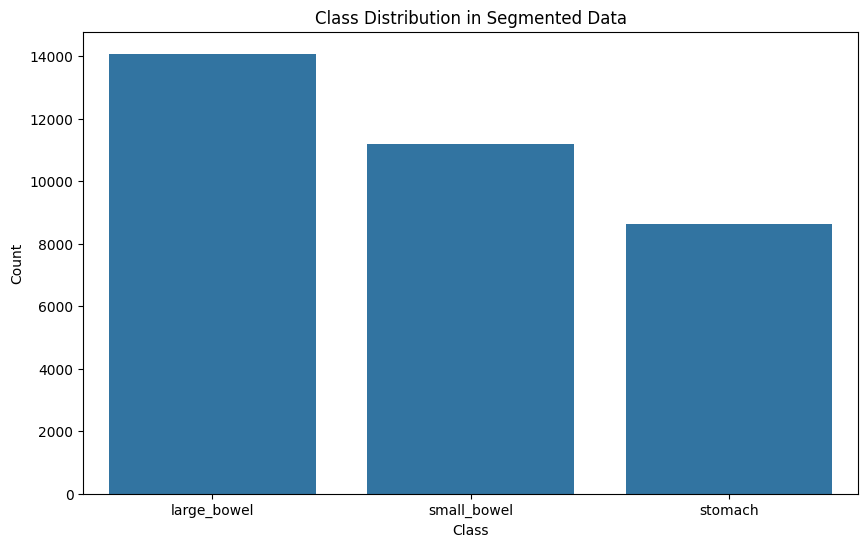

(class
 large_bowel    14085
 small_bowel    11201
 stomach         8627
 Name: count, dtype: int64,
 count                                                 33913
 unique                                                33899
 top       12629 10 12894 12 13158 15 13423 17 13688 19 1...
 freq                                                      2
 Name: segmentation, dtype: object)

In [12]:

class_distribution = df_with_segmentation['class'].value_counts()
segmentation_stats = df_with_segmentation['segmentation'].describe()

plt.figure(figsize=(10, 6))
sns.countplot(data=df_with_segmentation, x='class', order=class_distribution.index)
plt.title('Class Distribution in Segmented Data')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

class_distribution, segmentation_stats

## Exploring the Relationship Between `class` and `segmentation`

/var/folders/fm/j8jgcsf90d1g6lkqzrw2mptw0000gn/T/ipykernel_13717/1246948072.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_with_segmentation['segmentation_length'] = df_with_segmentation['segmentation'].apply(len)


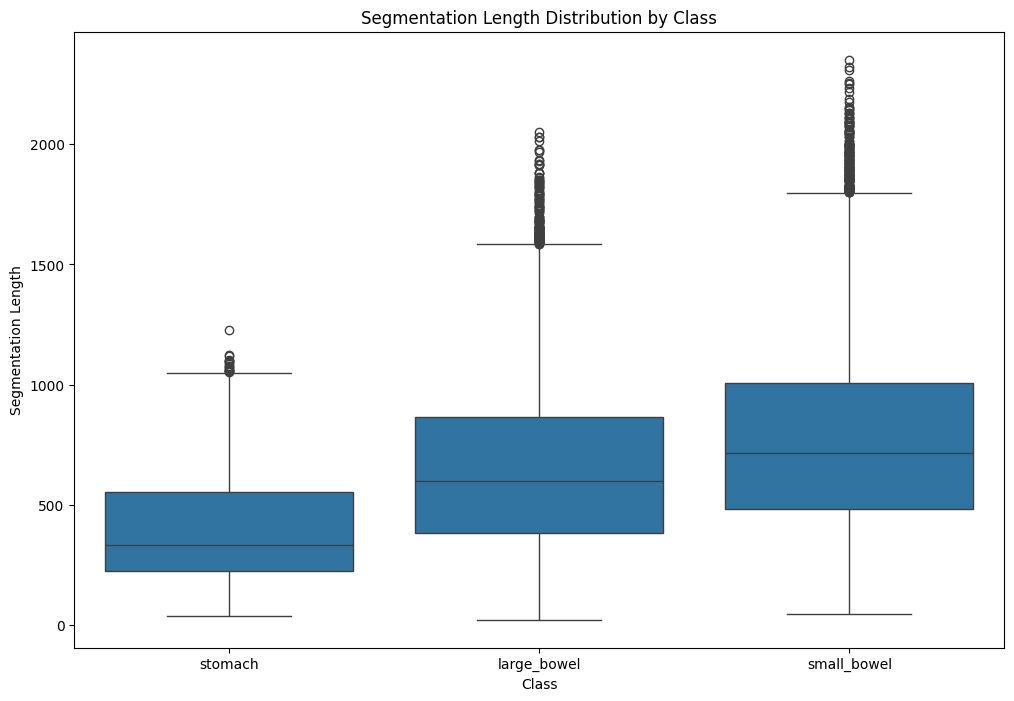

,count,mean,std,min,25%,50%,75%,max
class,,,,,,,,
large_bowel,14085.0,650.160028,338.489122,23.0,384.0,600.0,864.0,2052.0
small_bowel,11201.0,768.418445,417.593577,47.0,481.0,715.0,1008.0,2351.0
stomach,8627.0,400.699316,225.723125,39.0,224.0,332.0,555.0,1228.0


In [13]:
df_with_segmentation['segmentation_length'] = df_with_segmentation['segmentation'].apply(len)
segmentation_length_stats = df_with_segmentation.groupby('class')['segmentation_length'].describe()

plt.figure(figsize=(12, 8))
sns.boxplot(data=df_with_segmentation, x='class', y='segmentation_length')
plt.title('Segmentation Length Distribution by Class')
plt.xlabel('Class')
plt.ylabel('Segmentation Length')
plt.show()

segmentation_length_stats

## Insights into the Dataset without Segmentation Data

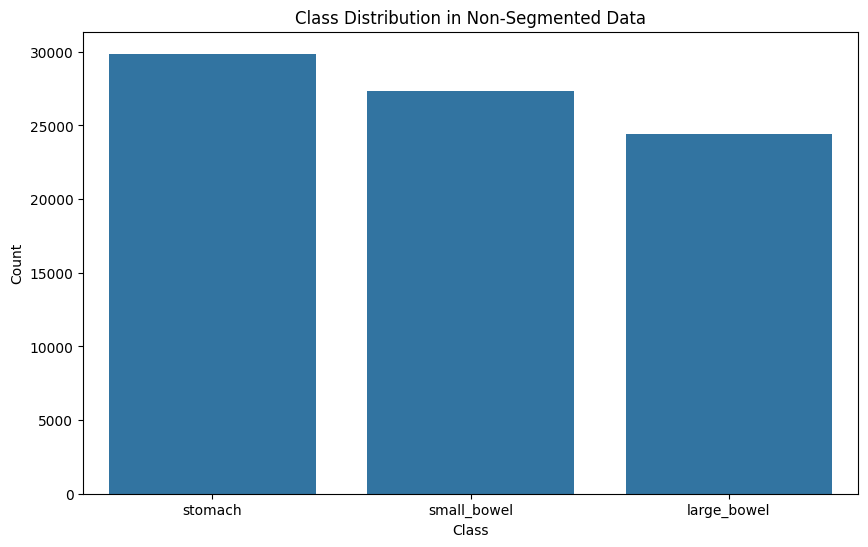

class
stomach        29869
small_bowel    27295
large_bowel    24411
Name: count, dtype: int64

In [14]:
class_distribution_no_segmentation = df_without_segmentation['class'].value_counts()

plt.figure(figsize=(10, 6))
sns.countplot(data=df_without_segmentation, x='class', order=class_distribution_no_segmentation.index)
plt.title('Class Distribution in Non-Segmented Data')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

class_distribution_no_segmentation


### Key Findings
1. **Class Distribution**:
   - In the segmented dataset, `large_bowel` is the most frequent class.
   - In the non-segmented dataset, `stomach` is the most frequent class.

2. **Segmentation Length Analysis**:
   - `small_bowel` has the highest mean segmentation length, indicating more complex or larger segmentation regions.
   - `large_bowel` and `stomach` follow with shorter mean segmentation lengths.

3. **Missing Segmentation Data**:
   - A significant portion (81.575 rows) of the dataset lacks segmentation data.
